Jacob Jawharjian Lab 10

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('darkgrid') 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

(0 pts) Load the data and partition it into a training set and test set

In [3]:
data = load_iris()
X = data['data']
y = data['target']

df = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['class'] = [data['target_names'][idx] for idx in y]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=7,
    stratify=y
)

df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


(3 pts) Build a decision tree classifier to predict the target

In [4]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=7)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)


(3 pts) Evaluate the predictions using the test set.

In [7]:
print('The accuracy of the model is: {}'.format(dt.score(X_test, y_test)))

y_pred = dt.predict(X_test)

target_names = data.target_names

print(classification_report(y_test, y_pred, target_names = target_names))

The accuracy of the model is: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



The accuracy of the Decision Tree model is 93.3%, a very solid accuracy figure. The precision and recall of each of the target classes is are strong as well.

(4 pts) Visualize the tree. Summarize your findings about the tree's ability to accurately predict this data.

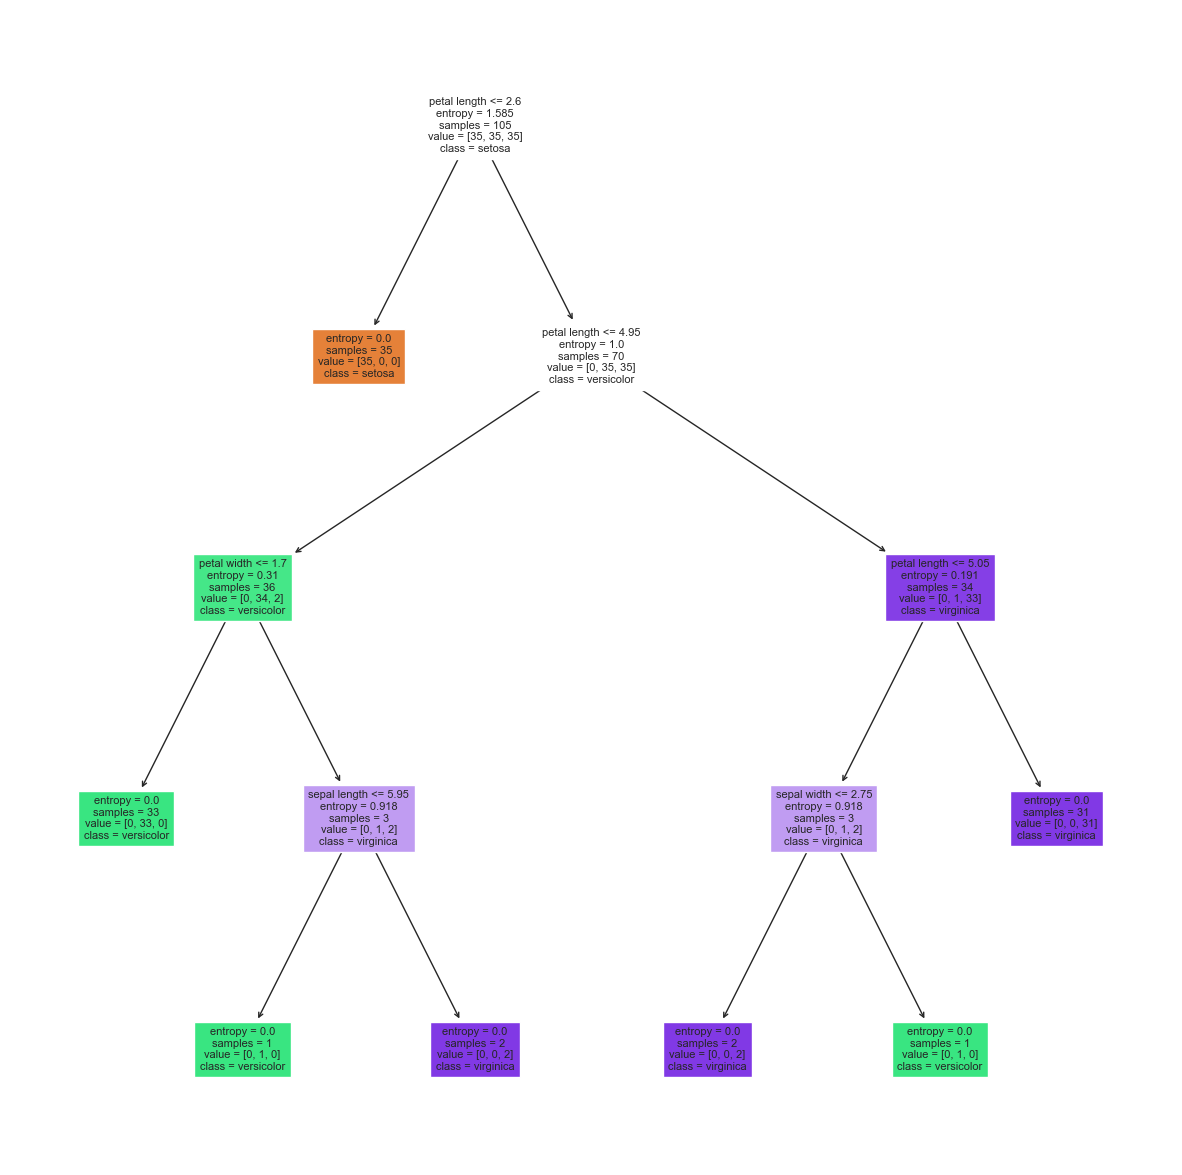

In [12]:

fig = plt.figure(figsize=(15, 15))
tree.plot_tree(dt, 
                   feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],  
                   class_names=target_names,
                   filled=True, fontsize=8)

plt.show()

The above decision tree visualization attempts to distinguish each flower as one of three possible classification types: Setosa, Versicolor, Virginica. Immediately, it identifies Setosa as those with petal length less than or equal to 2.6. It further distinguishes between Versicolor and Virginica, primarily, by examining the petal width. 